<a href="https://colab.research.google.com/github/risen9/scaler-projects/blob/main/Aerofit_Business_Case_Descriptive_Statistics_and_Probablity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

## Problem Statement

Aeorfit is a fitness equipment brand that makes treadmills and other exercise machines for a wide range of age groups.

With the data provided, we will be looking at the models Aerofit sells and what the characteristics of the average buyer look like for each model.

After analysis, I will also be providing recommendations and insights regarding my findings to better shape Aerofit's business decisions.

# Basic Metrics

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('aerofit_treadmill.csv')

The dataset provided shows sales data for three Aerofit Treadmill models



*   KP281 (1,500 USD)
*   KP481 (1,750 USD)
*   KP781 (2,500 USD)






In [ ]:
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
data.shape

(180, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


The initial exploratory analysis revealed that there are 9 columns that detail each purchase made, and the data is alphanumeric.

Fitness and Usage are int64, so we will be changing those into str.

Fitness is how the user rated how fit they were out of 5 after using their treadmill

Usage details how many times they used the treadmill in a week.

### Changing the datatypes to str

In [ ]:
data['Fitness'] = data['Fitness'].astype('str')
data['Usage'] = data['Usage'].astype('str')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    object
 6   Fitness        180 non-null    object
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 12.8+ KB


In [ ]:
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
data.describe(include = 'object')

,Product,Gender,MaritalStatus,Usage,Fitness
count,180,180,180,180,180
unique,3,2,2,6,5
top,KP281,Male,Partnered,3,3
freq,80,104,107,69,97


Now that objects have also been included, we see that the KP281 model is the highest sold, and that males buy more Aerofit treadmills.

Most of the sales are made to partnered buyers.

In [ ]:
data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


Looking at the statistical summary, we see that the mean age of an Aerofit treadmill is 28 years old, and have an average income of $53,719


Buyers also used their treadmills for walking an average of 103 miles per week, around 3 times a week.

People also rated their fitness 3.3 out of 5 on average after using their treadmill.

### Duplicate value check

In [ ]:
data.duplicated().value_counts()

False    180
Name: count, dtype: int64

No data has been duplicated

### Outlier check

<Axes: xlabel='Miles'>

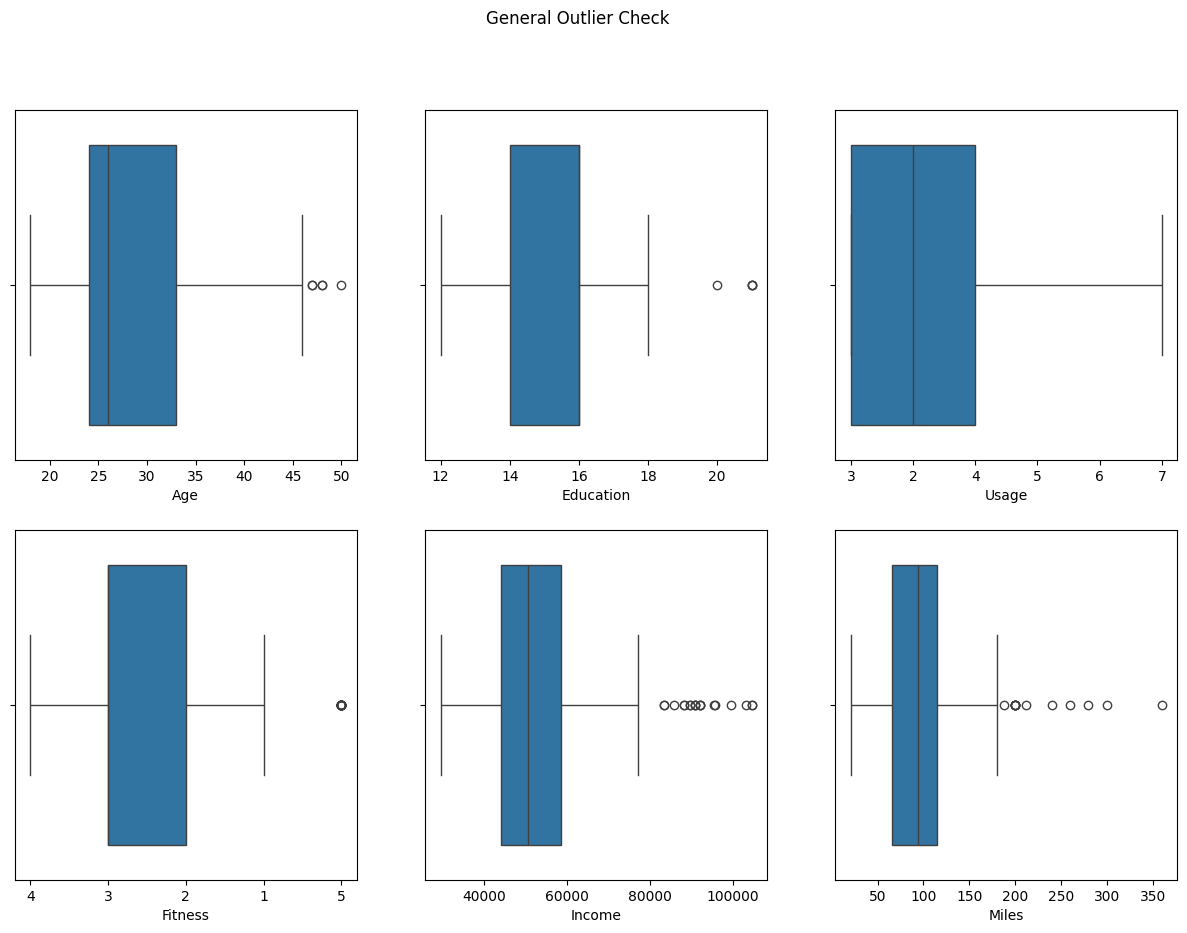

In [ ]:
fig, ax = plt.subplots(2,3, figsize=(15,10))
fig.suptitle('General Outlier Check')

# Age
sns.boxplot(data = data, x='Age', ax=ax[0,0])

# Education
sns.boxplot(data = data, x='Education', ax=ax[0,1])

# Usage
sns.boxplot(data = data, x='Usage', ax=ax[0,2])

# Fitness
sns.boxplot(data = data, x='Fitness', ax=ax[1,0])

# Income
sns.boxplot(data = data, x='Income', ax=ax[1,1])

# Miles
sns.boxplot(data = data, x='Miles', ax=ax[1,2])

Most of the data have very few outliers except in the case of Income and Miles (upto a point).



# Checking if features like marital status, age, gender have any effect on what product is purchased

### For data like Age, Education, income and miles, it is better to categorise them to make analysis easier


### Categorising age into age groups




*   Young Adults - Ages 18-26
*   Adults - 27-37
*   Middle aged - 38-46
*   Older adults - 47-50

In [ ]:
# before we categorise, we need to create the correct bins

bin_age = [17,26,37,46,50]
age_labels = ['Young Adults', 'Adults', 'Middle Aged', 'Older Adults']

data['age_group'] = pd.cut(data['Age'],bins = bin_age, labels = age_labels)

### Categorising education groups

* Primary Education - upto 12 yrs
* Secondary Education - 13 to 16 yrs
* Higher education or more - 17 or more years

In [ ]:
bin_edu = [0,12,16,float('inf')]
edu_labels = ['Primary Education', 'Secondary Education ', 'Higher education']

data['edu_group'] = pd.cut(data['Education'],bins = bin_edu, labels = edu_labels)

### Categorising income groups

* Lower income - 40,000 or less
* Middle income - 40,000 - 60,000
* High income - 60,000 - 80,000
* Highest income - more than 80,000

In [ ]:
bin_income = [0,40000,60000,80000,float('inf')]
income_labels = ['Lower income', 'Middle income ', 'High income', 'Highest income']

data['income_group'] = pd.cut(data['Income'],bins = bin_income, labels = income_labels)

### Categorising mileage groups

* Light use - up to 60 miles
* Moderate use - 61 - 100 miles
* Heavy use - 101 - 200 miles
* Gymrat - 201 or more

In [ ]:
bin_miles = [0,60,100,200,float('inf')]
miles_labels = ['Light use', 'Moderate use', 'Heavy use', 'Gymrat']

data['miles_group'] = pd.cut(data['Miles'],bins = bin_miles, labels = miles_labels)

In [ ]:
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_group,edu_group,income_group,usage_group,miles_group
0,KP281,18,Male,14,Single,3,4,29562,112,Young Adults,Secondary Education,Lower income,Light use,Heavy use
1,KP281,19,Male,15,Single,2,3,31836,75,Young Adults,Secondary Education,Lower income,Light use,Moderate use
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young Adults,Secondary Education,Lower income,Light use,Moderate use
3,KP281,19,Male,12,Single,3,3,32973,85,Young Adults,Primary Education,Lower income,Light use,Moderate use
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young Adults,Secondary Education,Lower income,Light use,Light use


### Marital status vs what model was purchased

<Axes: xlabel='Product', ylabel='count'>

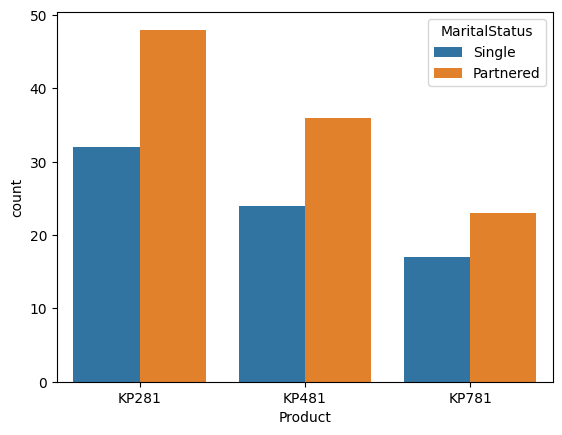

In [ ]:
# Marital status

sns.countplot(data = data, x='Product', hue='MaritalStatus')

Most treadmills were purchased by partnered individuals, with the KP281 coming out as the highest selling model among both single and partnered buyers

### Age vs what model was purchased

<Axes: xlabel='age_group', ylabel='count'>

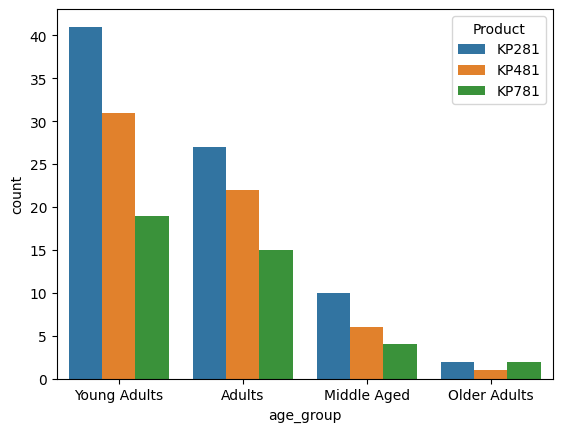

In [ ]:
sns.countplot(data = data, x = 'age_group', hue='Product')

Young adults tend to have purchased more treadmills from Aerofit, and the KP281 leads this segment as well thanks to its pricing.

We also see that among older adults, the most expensive KP781 model, is also as popular as the KP281.

This could be attributed to higher income individuals appearing disproportionately in that age group compared to the others.

### Income group vs model

<Axes: xlabel='income_group', ylabel='count'>

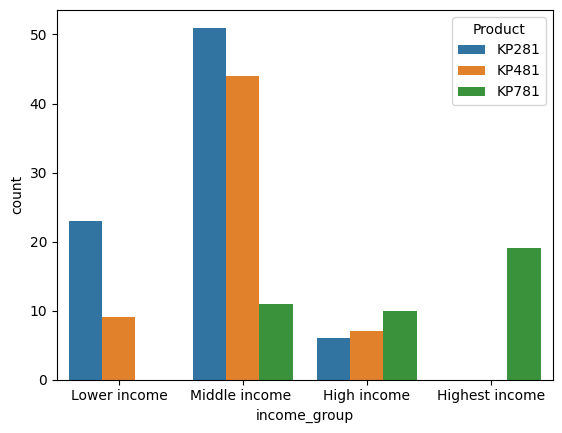

In [ ]:
sns.countplot(data = data, x = 'income_group', hue='Product')

Middle income group is the biggest buyer of Aerofit treadmills, and most purchases were for the KP281 and KP481 models.

The most expensive model, the KP781, is absent in the lower income group because it is priced beyond their ability.

We also see an anomaly in the highest income group where they have only purchased the KP781 because they can afford the best model that Aerofit offers.

### Education level vs model

<Axes: xlabel='edu_group', ylabel='count'>

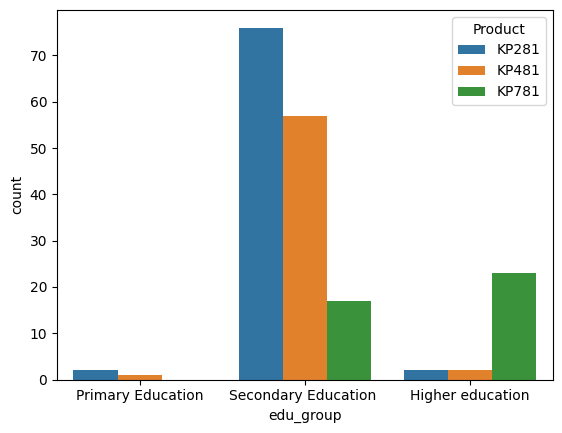

In [ ]:
sns.countplot(data = data, x = 'edu_group', hue='Product')

Among education levels, buyers with a secondary education level dominate the purchases.

This data suppports the fact that you will need a well paying job to afford a $1,500 treadmill for your home.


As a result of higher education of more than 17 years, that group can afford to buy the KP781 a lot more than the other groups.

You could also make the assumption that they did their research more intensely before picking out a model regardless of their income level because of their higher education level.


# Checking correlation

In [ ]:
data_copy = data.copy(deep=1)

## Pairplot

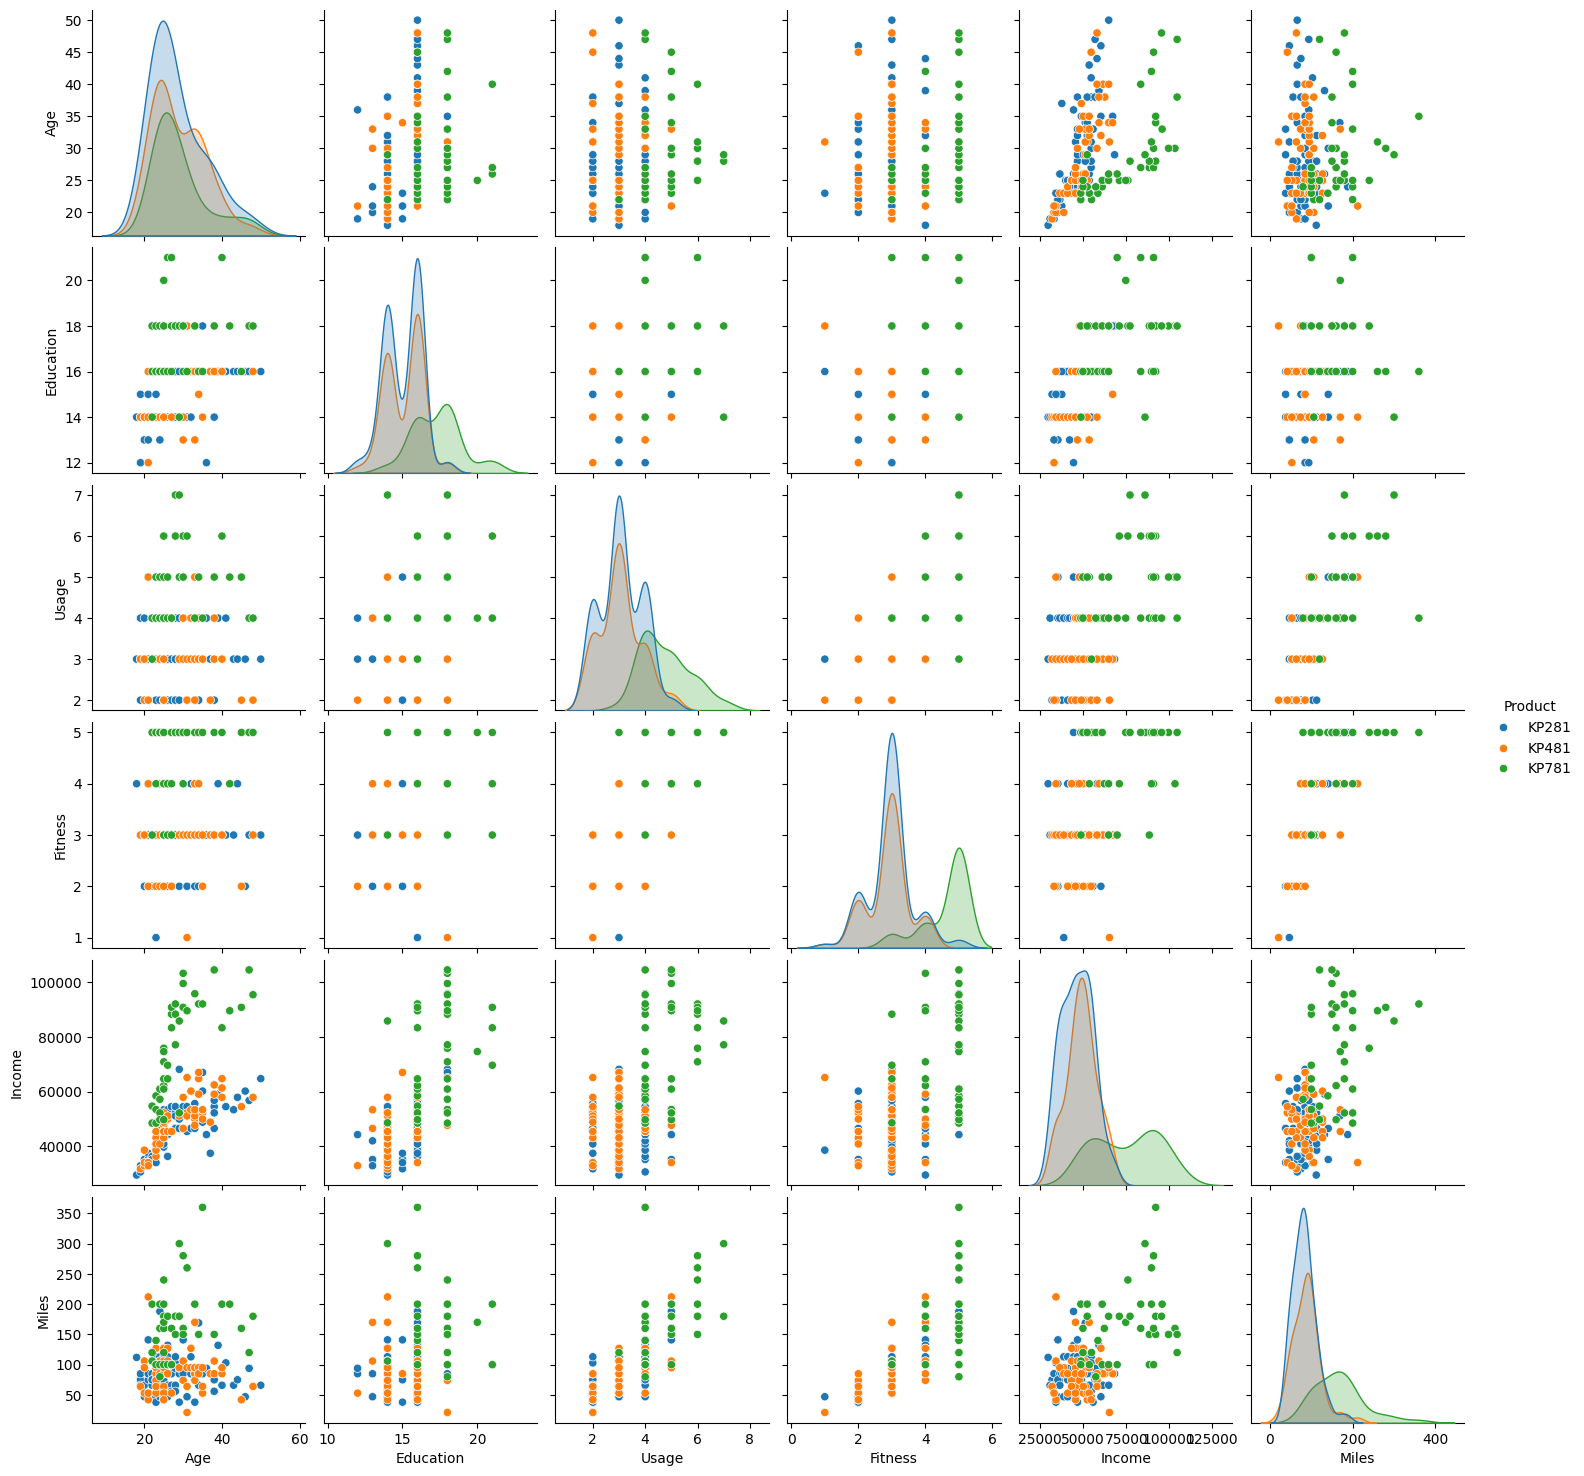

In [ ]:
sns.pairplot(data_copy, hue = 'Product')

## Heatmap

Converting to int for correlation

In [ ]:

data_copy['Usage'] = data_copy['Usage'].astype('int')
data_copy['Fitness'] = data_copy['Fitness'].astype('int')
data_copy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    object  
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    object  
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    object  
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
 9   age_group      180 non-null    category
 10  edu_group      180 non-null    category
 11  income_group   180 non-null    category
 12  usage_group    180 non-null    category
dtypes: category(4), int64(6), object(3)
memory usage: 14.2+ KB


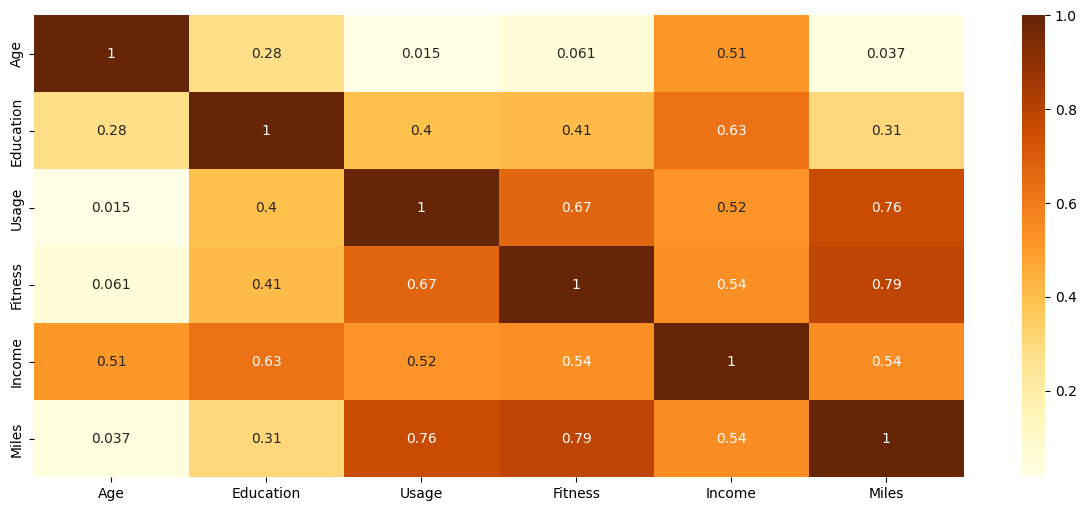

In [ ]:

correlation = data_copy.corr(numeric_only=True)

plt.figure(figsize=(15,6))

sns.heatmap(correlation, annot=True, cmap='YlOrBr')
plt.show()

* We see a strong correlation between the number of miles the treadmill has been run vs the usage and fitness ratings users have given us.

* We also see a strong correlation between fitness and usage ratings as well.


* When it comes to the customer, education and income are highly correlated as expected as well as age and income.


# Looking at Probabilities

## Model purchased based on gender

In [ ]:
pd.crosstab(index = data['Product'], columns = data['Gender'], margins = True, normalize=True).round(3)

Gender,Female,Male,All
Product,,,
KP281,0.222,0.222,0.444
KP481,0.161,0.172,0.333
KP781,0.039,0.183,0.222
All,0.422,0.578,1.000


### Female purchase probability

* The probabilty of a Female buying a treadmill is 42.2%.

  * The conditional probabilty of females getting the KP781 is 4%
  * For the KP481, it is 16.1%
  * While it is 22.2% for the KP281









### Male purchase probability

* The probabilty of a Male buying a treadmill is 57.8%.

  * The conditional probabilty of females getting the KP781 is 18.3%
  * For the KP481, it is 17.2%
  * While it is 22.2% for the KP281


Males are more likely to buy an Aerofit treadmill, and among both gender groups, you are more likely to see KP281 owners than other models with a 44% chance.

## Model purchased based on age

In [ ]:
pd.crosstab(index = data['Product'], columns = data['age_group'], margins = True, normalize=True).round(3)

age_group,Young Adults,Adults,Middle Aged,Older Adults,All
Product,,,,,
KP281,0.228,0.150,0.056,0.011,0.444
KP481,0.172,0.122,0.033,0.006,0.333
KP781,0.106,0.083,0.022,0.011,0.222
All,0.506,0.356,0.111,0.028,1.000


### Young adult or adult purchase probability

* There is a 50.6% chance that a young adult purchased a treadmill, while the chances of it being an Adult is 35.6%

  * Among young adults
  
    * 22.8% probability of it being the KP281
    * 17.2% probability of it being the KP481
    * 10.6% probability of it being the KP781
  
  * Among Adults

    * 15% probability of it being the KP281
    * 12.2% probability of it being the KP481
    * 8.3% probability of it being the KP781


### Middle aged or Older adult purchase probability

* There is a 11.1% chance that a middle aged adult purchased a treadmill, while the chances of it being an Older Adult is 2.8%

  * Among middle aged adults
  
    * 5.6% probability of it being the KP281
    * 3.3% probability of it being the KP481
    * 2.2% probability of it being the KP781
  
  * Among Older Adults

    * 1.1% probability of it being the KP281
    * 0.6% probability of it being the KP481
    * 1.1% probability of it being the KP781

Overall, the middle aged and older adult demographic is much less probable to buy a treadmill from Aerofit, with much more of the sales coming from the Young adult and adult demographics.

## Model purchased based on Education level


In [ ]:
pd.crosstab(index = data['Product'], columns = data['edu_group'], margins = True, normalize=True).round(3)

edu_group,Primary Education,Secondary Education,Higher education,All
Product,,,,
KP281,0.011,0.422,0.011,0.444
KP481,0.006,0.317,0.011,0.333
KP781,0.000,0.094,0.128,0.222
All,0.017,0.833,0.150,1.000


### Primary level education purchase probabilty

* There is only a 1.7% chance of a buyer being at the primary level

  * 1.1% chance of it being the KP281
  * 0.6% chance of it being the KP481
  * 0% chance of it being the KP781

### Secondary level education purchase probabilty

* There is an 83.3% chance of a buyer being at the Secondary level

  * 42.2% chance of it being the KP281
  * 31.7% chance of it being the KP481
  * 9.4% chance of it being the KP781

### Higher level education purchase probabilty

* There is a 15% chance of a buyer being at the Higher level

  * 1.1% chance of it being the KP281
  * 1.1% chance of it being the KP481
  * 12.8% chance of it being the KP781

## Model purchased based on Income group

In [ ]:
pd.crosstab(index = data['Product'], columns = data['income_group'], margins = True, normalize=True).round(3)

income_group,Lower income,Middle income,High income,Highest income,All
Product,,,,,
KP281,0.128,0.283,0.033,0.000,0.444
KP481,0.050,0.244,0.039,0.000,0.333
KP781,0.000,0.061,0.056,0.106,0.222
All,0.178,0.589,0.128,0.106,1.000


### Lower income purchase probability

Lower income -
Middle income -
High income - 60,000 - 80,000
Highest income - more than 80,000

* There is a 17.8% chance of the buyer coming from the lower income bracket (40,000 or less)

  * 12.8% the purchase was a KP281
  * 5% chance it was a KP481
  * 0% chance of it being a KP781

### Middle income purchase probability

* There is a 58.9% chance of the buyer coming from the Middle income bracket (40,000 - 60,000)

  * 28.3% the purchase was a KP281
  * 24.4% chance it was a KP481
  * 6.1% chance of it being a KP781

### High income purchase probability

* There is a 12.8% chance of the buyer coming from the High income bracket (60,000 to 80,000)

  * 3.3% the purchase was a KP281
  * 3.9% chance it was a KP481
  * 5.6% chance of it being a KP781

### Highest income purchase probability

* There is a 10.6% chance of the buyer coming from the Highest income bracket (more than 80,000)

  * 0% chance it was a KP281 or KP481
  * 10.6% chance of it being a KP781

## Model purchased based on relationship status



In [ ]:
pd.crosstab(index = data['Product'], columns = data['MaritalStatus'], margins = True, normalize=True).round(3)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,0.267,0.178,0.444
KP481,0.200,0.133,0.333
KP781,0.128,0.094,0.222
All,0.594,0.406,1.000


### Single buyer purchase probability

* There is a 40.6% chance that the buyer is single and the conditional probabilty given that the buyer is single is:

    * 26.7% chance that it was a KP281
    * 20% chance that it was a KP481
    * 12.8% chance that it was a KP781

### Partnered buyer purchase probabilty

* 40.6% of buyers are partnered and probability of the model purchased given that the customer is married is

  * 17.8% chance it was a KP281
  * 13.3% chance it was a KP481
  * 9.4% chance it was a KP781

## Model purchased based on weekly usage statistics

In [ ]:
pd.crosstab(index = data['Product'], columns = data['Usage'], margins = True, normalize=True).round(3)

Usage,2,3,4,5,6,7,All
Product,,,,,,,
KP281,0.106,0.206,0.122,0.011,0.000,0.000,0.444
KP481,0.078,0.172,0.067,0.017,0.000,0.000,0.333
KP781,0.000,0.006,0.100,0.067,0.039,0.011,0.222
All,0.183,0.383,0.289,0.094,0.039,0.011,1.000


* The probability of someone buying a treadmill and uses it 3 times a week is 38.3%

  * There is a 20.6% chance of the purchased product in this case to be the KP281
  * 17.2% chance that it was a KP481
  * 0.6% chance that it was a KP781

* The probability of someone buying a treadmill and uses it 4 times a week is 28.9%

  * 12.2% chance of it being the KP281
  * 6.7% chance of it being the KP481
  * 10% chance of it being the KP781

## Model purchased based on customer fitness rating

In [ ]:
pd.crosstab(index = data['Product'], columns = data['Fitness'], margins = True, normalize=True).round(3)

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,0.006,0.078,0.300,0.050,0.011,0.444
KP481,0.006,0.067,0.217,0.044,0.000,0.333
KP781,0.000,0.000,0.022,0.039,0.161,0.222
All,0.011,0.144,0.539,0.133,0.172,1.000


The probabilty of someone with average fitness score of 3 buying an Aerofit treadmill is 53.9%

  * 30% chance it was the KP281
  * 21.7% chance it was the KP481
  * 2.2% chance it was the KP781


The probabilty of someone with above average fitness score of 4 buying an Aerofit treadmill is 53.9%

  * 50% chance it was the KP281
  * 4.4% chance it was the KP481
  * 3.9% chance it was the KP781

The probabilty of someone with the best fitness score of 5 buying an Aerofit treadmill is 17.2%

  * 1.1% chance it was the KP281
  * 0% chance it was the KP481
  * 16.1% chance it was the KP781

# Model purchased based on miles ran weekly

In [ ]:
pd.crosstab(index = data['Product'], columns = data['miles_group'], margins = True, normalize=True).round(3)

miles_group,Light use,Moderate use,Heavy use,Gymrat,All
Product,,,,,
KP281,0.100,0.244,0.100,0.000,0.444
KP481,0.067,0.178,0.083,0.006,0.333
KP781,0.000,0.044,0.150,0.028,0.222
All,0.167,0.467,0.333,0.033,1.000


The probability of someone buying a treadmill and uses it moderately is 46.7%

  * 24.4% chance that it is an KP281 given that it was someone who used the treadmill moderately.
  * 17.8% it was a KP481
  * 4.4% chance it was a KP781

The probabilty that it was a heavy user is 33.3%

* 10% chance that the treadmill was the KP281
* 8.3% chance it was the KP481
* 15% chance it was the KP781

# Profiling the customer


Now that we have an idea of what type of customer buys which model, we can create a profile of the average customer that buys each model that Aerofit offers.


## Customer profile for the KP281

 * Age: 18-26. Can also be 27-37 year olds
 * Education level: Secondary education or above
 * Income group: Middle and lower income brackets
 * Could be using it 3-4 times on average
 * A fitness score of 3 or 4
 * Runs between 61- 100 miles per week


## Customer profile for the KP481

* Ages 18-26, as well as the 27-37 age group
* Education level: Secondary education or above
* Middle income bracket buyer
* Could be using at around 3 times a week
* A fitness score of 4
* Runs between 61-100 miles a week

## Customer profile for the KP781

* Ages 18-26 and the 27-37 age group
* Education level: 17 or more years of education
* More than 80,000USD of income a year.
* Uses it around 3 times a week
* A fitness score of 5
* Runs for 100 miles a week or more


# Recommendations

## Midrange model not very popular

The midrange model, the KP481, is not as popular as the KP281 among lower and middle income buyers, or as the KP781 is with the highest income bracket.

Aerofit can look to market the model better to age groups or have price cuts on it once a while to sell them.

## Partnering with Buy Now Pay Later services

BNPL services are quickly growing at the moment, and it can make higher end products like the KP781 more attractive to the demographics that Aerofit is targeting.

The 18-27 age group have accepted BNPL as a part of their purchase experience, and it could clear the price barrier that the more expensive models put up.


## Having interactive exercise routines

Some treadmill brands like Peloton offer training modules on a tablet on the treadmill, and Aerofit could try something like that where the user can take part in cardio routines while working out.

Aerofit can also monetize this service like Peloton does with a tiered subscription service that has more personalized routines.
The 18-27 age group could be the biggest target for this change.
